<!--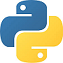-->
# 05 Asymptotic Notation 

## Plan for the Lecture: 

1. Big O Theory 

2. How to measure run-time

3. Exploring the run-time classifications

# Asymptotic complexity (Algorithmic Complexity)
Below is summarised from Cormen et al. (2022) book 'Algorithms': 

* Asymptotic complexity, often referred to as algorithmic complexity, is a way to analyse and describe the efficiency of an algorithm in terms of how its runtime or resource usage grows relative to the size of the input data. 

* It provides a mathematical of measuring an algorithm's performance by how it scales for large input sizes. 

* The most commonly used notations for asymptotic complexity are Big O, Big Theta, and Big Omega:
 
* Big O notation describes the asymptotic <b>upper bound</b> – grows no faster than this rate $O(n)$ – <b>no more than </b> linear time
* Big Omega $\Omega(n)$ describes the asymptotic <b>lower bound</b> – grows at least as fast as this rate $\Omega(n)$ – <b>at least</b> linear time
* Big Theta $\Theta(n)$ describes the asymptotically <b>tight bounds</b> – grows precisely at a certain rate $\Theta(n)$ – <b>exactly</b> linear time (upper and lower bounds are the same)

![greek_symbols](https://www.in2greece.com/english/wp-content/uploads/2024/02/greek-alphabet.jpg)


# Algorithmic Common Runtimes #
The common algorithmic runtimes from fastest to slowest are:

- constant: $O(1)$
- logarithmic: $O(log$ $n)$
- linear: $O(n)$
- linearithmic $O(n$ $log$ $n)$
- quadratic: $O(n^2)$
- exponential: $O(2^n)$ 
- factorial: $O(n!)$


![bigo](https://cdn-media-1.freecodecamp.org/images/1*KfZYFUT2OKfjekJlCeYvuQ.jpeg)

## Performance subject to variable conditions

* The number and type of operations performed by the algorithm.

* The number of elements or nodes in a data structure.

* How the elements or nodes are arranged (sorted or unsorted).

* Also dependent upon other factors such as computer architecture and processor speed.


## Best, Average and Worst case

* <b>Best case</b>: If we’re searching for an element that happens to be near the start of the data structure or the elements are nearly sorted; the algorithm will complete quickly.

* <b>Average case</b>: If the element resides around the middle of the array.

* <b>Worst case</b>: If we’re searching for an element happens to be near the end of the data structure or the data structure is completely unsorted, the algorithm will take longer.

## How do you calculate the run-time?
(below is from Gayle Laakmann McDowell's 'Cracking the Coding Interview book'):
* <b>Different steps get added</b>

```
    def function(): 
        do_step_1() # O(a)
        do_step_2() # O(b)    = O(a+b)
```

* <b>Drop constants</b>
    * Rememeber $n$ is the size of the array / list.
    * Tempting to describe below as $2 \times O(n)$ or $O(2n)$
    * Instead, drop the constant ($2$) is 'droppped' and focus on the runtime category of $O(n)$ or `linear`. 
    * It's the `linear` classification rather than the `quadratic` classification.
```
    def min_max(l): 
        for i in l: # O(n)
            calc_min()
        for i in l: # O(n)
            calc_max()
```

* <b>Different inputs (different arrays sizes) are treated independently</b>

    * Below is NOT $O(n^2)$ if list `a` and `b` are different sizes `(l_a != l_b)`
    * The size $n$ would have to be the same for both list `a` and list `b` to be $n \times n$
```
        def intersection(l_a, l_b):
            count = 0
            for a in l_a:       # O(a)
                for b in l_b:   # O(b)      O(a x b)
                    if a == b:
                        count += 1
            return count
```


* <b>Drop non-determinent terms</b>

    * Out of the two runtime categories below, which is the most descriptive of the function (on average)? 
    * We don't need to classify this function as $O(n) + O(n^2)$ or $O(n + n^2)$
    * $O(n)$ could be the best case if we don't run the nested loop. 
    * $O(n^2)$ would describe the average case if we had to run the nested loop. 

```
    def loop_mix():
        for i in l: # O(n)
            do_something()

        for i in l: # O(n x n) = O(n^2)       
            for j in l: 
                do_something_else()
```


## Let's import time so we can measure performance

In [25]:
import time
import random

## <font color = "red">Important note on Jupyter!</font>
To improve the performance, Jupyter will store outputs and previous calculations (caching/dynamic programming) to save you having to recalcuate these again... For the purposes of our speed tests, we will want to flush out the cache each time so we can check for consistency. Furthermore, Jupyter writes the outputs into the notebook, so the notbeook may become too big to sync with repositories.

In VSC, look for the top menu of the window, which has | + Code | + Markdown | Run All | Restart | Clear All Outputs | 

Click on 'Clear All Outputs' to flush out the cache and reduce the file size. 

If you're in Jupyter/Anancoda, go to the Cell menu at the top of the notebook interface.
	•	Select All Outputs.
	•	Then click Clear.

## Time it takes to access/print all items in a list: $O(n)$

### 500 items

In [2]:
size = 500
call_count = 0 
l = range(size)

start_time = time.time()  # Start time

for i in l: 
    print(i)
    call_count += 1  

end_time = time.time()    # End time

execution_time_500 = end_time - start_time  # Calculate the elapsed time
print("Time taken to read", size, "elements =", float(execution_time_500), "seconds")
print("Number of function calls:", call_count)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### 50,000 items

In [3]:
size = 50000
call_count = 0 
l = range(size)

start_time = time.time()  # Start time

for i in l: 
    print(i)
    call_count += 1 
    
end_time = time.time()    # End time

execution_time = end_time - start_time  # Calculate the elapsed time
print("Time taken to read", size, "elements =", execution_time, "seconds")
print("Number of function calls:", call_count)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### 5,000,000 items

In [ ]:
size = 5000000
call_count = 0 
l = range(size)

start_time = time.time()  # Start time

for i in l: 
    print(i)
    call_count += 1 
    
end_time = time.time()    # End time

execution_time = end_time - start_time  # Calculate the elapsed time
print("Time taken to read", size, "elements =", execution_time, "seconds")
print("Number of function calls:", call_count)

## Accessing an item within a list - slight fluctuations but $O(1)$

In [ ]:
size = 5000000
call_count = 0 
l = range(size)

start_time = 0
end_time = 0
start_time = time.time()  # Start time

print(l[4999999])
call_count += 1 
    
end_time = time.time()    # End time

execution_time = end_time - start_time  # Calculate the elapsed time
print("Time taken to read l[4,999,999] took =", execution_time, "seconds")
print("Number of function calls:", call_count)

In [ ]:
size = 5000000
call_count = 0 
l = range(size)

start_time = 0
end_time = 0
start_time = time.time()  # Start time

print(l[2999999])
call_count += 1 
    
end_time = time.time()    # End time

execution_time = end_time - start_time  # Calculate the elapsed time
print("Time taken to read l[2,999,999] took =", execution_time, "seconds")
print("Number of function calls:", call_count)

In [ ]:
size = 5000000
call_count = 0 
l = range(size)

start_time = 0
end_time = 0
start_time = time.time()  # Start time

print(l[0])
call_count += 1 
    
end_time = time.time()    # End time

execution_time = end_time - start_time  # Calculate the elapsed time
print("Time taken to read l[0] took =", execution_time, "seconds")
print("Number of function calls:", call_count)

## Quadratic: $O(n)$ &times; $O(n) = O(n^2)$

If one loop that reads the entirity of a data structure would be $O(n)$    
  So a loop inside a loop would be $O(n)$ &times; $O(n) = O(n^2)$

### size of 500 
$O(n)$ = 500  
  $O(n^2)$ = 250,000

In [4]:
500    # O(n)

500

In [5]:
500 * 500   # O(n) * O(n)

250000

In [6]:
size = 500
call_count = 0 
l = range(size)

start_time = 0
end_time = 0
start_time = time.time()  # Start time

for i in l:
    for i in l: 
        print(i)
        call_count += 1 
    
end_time = time.time()    # End time

execution_time = end_time - start_time  # Calculate the elapsed time
print("Time taken to print a loop of", size, "elements,",size,"times took =", execution_time, "seconds")
print("Number of function calls:", call_count)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

### size of 5000 - could take up to a minute to complete!
$O(n)$ = 500  
  $O(n^2)$ = 25,000,000

In [7]:
5000 * 5000

25000000

In [ ]:
size = 5000
call_count = 0 
l = range(size)

start_time = 0
end_time = 0
start_time = time.time()  # Start time

for i in l:
    for i in l: 
        print(i)
        call_count += 1 
    
end_time = time.time()    # End time

execution_time = end_time - start_time  # Calculate the elapsed time
print("Time taken to print a loop of", size, "elements,",size,"times took =", execution_time, "seconds")
print("Number of function calls:", call_count)

## Logarithmic $O$($log$ $n$) - binary search or 'divide and conquer'

The mathematical function log base 2 ($log$<sub>2</sub>) gives you the 'power' to multiply 2 by to get the original number.      
  
  For example:   
    2<sup>3</sup> = 8     (2 * 2 * 2)  
therefore  
  log<sub>2</sub>(8) = 3 

  For example:   
    2<sup>12</sup> = 4096     (2 * 2 * 2 * 2 * 2 * 2 * 2 * 2 * 2 * 2 * 2 * 2 * 2)  
therefore  
  log<sub>2</sub>(4096) = 12 

So, as you can see, the results of the logarithmic function grows 'slower' than quadratic O($n$<sup>2</sup>) algorithms. Larger values can produce smaller results. Compare O($log$ $n$) against O($n$<sup>2</sup>) on the chart at the top of the notebook. 

This algorithm is applied to subdivide data structures (split in half) for binary search. Binary search applies this algorithm to arranged trees and sorted algorithms to locate values faster in larger data structures.




In [20]:
def log_2(n):
    if n == 1:
        return 0
    else:
        return 1 + log_2(n // 2) # floor divide

number = 8
result = log_2(number)
print(f"log2({number}) = {result}")

number = 16
result = log_2(number)
print(f"log2({number}) = {result}")

number = 4096
result = log_2(number)
print(f"log2({number}) = {result}")

number = 8000000
result = log_2(number)
print(f"log2({number}) = {result}")

log2(8) = 3
log2(16) = 4
log2(4096) = 12
log2(8000000) = 22


## Linear-ithmic O(n log n) - linear + logarithmic

$O(n)$ &times; $O(log$ $n) = O(n$ $log$ $n)$

Whilst $O(log$ $n)$ could be used effectively to <b>search</b>.  
  In order to <b>sort</b>, algorithms that merge divided parts of the data structure (merge sort), would have to perform this $n$ times, therefore $O(n$ $log$ $n)$

For a correctly implemented `merge_sort`, the call count should correspond to the number of times the `merge_sort()` function is called. 

For an array of size $n$ :  
* The `merge_sort()` function is called  $2n-1$  times in total.
* For an array of 500 elements, the call count should be 999 (2*500-1).
* For an array of 5000 elements, the call count should be 9999 (2*5000-1).

### Generate a list of random numbers to simulate a unsorted list

In [73]:
size = 50000

# Generate a list of random numbers between 0 and size-1 (4999)
l = random.sample(range(size), size)
print("values:", l)
print("size:", len(l))

values: [5392, 5578, 35138, 44790, 35120, 35577, 7707, 24990, 6557, 15737, 34417, 40413, 34331, 34701, 44602, 19593, 44062, 11646, 16166, 10748, 8198, 43939, 22282, 11770, 21723, 25329, 49712, 35986, 23284, 44037, 35206, 2395, 39183, 12238, 1493, 13651, 16072, 5997, 4286, 17281, 26374, 32628, 29940, 17401, 18797, 20587, 1657, 43943, 24349, 32362, 31036, 15533, 5213, 43773, 11591, 12191, 14361, 42792, 22242, 5883, 8577, 31706, 23131, 45838, 30047, 45386, 17563, 22350, 7284, 32593, 47660, 32189, 1377, 21504, 24120, 10053, 17034, 24170, 46919, 18429, 36490, 10092, 38789, 8313, 929, 33601, 46813, 43172, 299, 47421, 41786, 42231, 26832, 1435, 44050, 4764, 13491, 27799, 25558, 29891, 31569, 24184, 7624, 24954, 46062, 3130, 25930, 25427, 1469, 29741, 13678, 34203, 5842, 31524, 11593, 13380, 5016, 29274, 20972, 21788, 39102, 44654, 43512, 33063, 2709, 14876, 33664, 19965, 47780, 5588, 15953, 23929, 40957, 24956, 21566, 3444, 14127, 48445, 19026, 31207, 17645, 20011, 45606, 23924, 47012, 43178,

In [74]:
call_count = 0 

start_time = 0
end_time = 0
start_time = time.time()  # Start time


def merge_sort(arr):
    global call_count
    call_count += 1  # Increment the counter on each function call
    
    if len(arr) <= 1:
        return arr

    # Divide the array into two halves
    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid])
    right_half = merge_sort(arr[mid:])

    # Merge the sorted halves
    return merge(left_half, right_half)

def merge(left, right):
    sorted_array = []
    i = j = 0

    # Merge the two halves while maintaining sorted order
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            sorted_array.append(left[i])
            i += 1
        else:
            sorted_array.append(right[j])
            j += 1

    # Append any remaining elements
    sorted_array.extend(left[i:])
    sorted_array.extend(right[j:])

    return sorted_array



sorted_arr = merge_sort(l)
end_time = time.time()    # End time
print(sorted_arr)

execution_time = end_time - start_time  # Calculate the elapsed time
print("Time taken to sort an unsorted array of", size, "elements took", execution_time, "seconds")
print("Number of function calls:", call_count)

#print("Sorted array:", sorted_arr)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [72]:
print("Time taken to sort an unsorted array of", size, "elements took", execution_time, "seconds")
print("Number of function calls:", call_count)

Time taken to sort an unsorted array of 500000 elements took 1.6962108612060547 seconds
Number of function calls: 999999


## Exponential $O(2^n)$ - unoptimised recursion

See below for the difference between F(10), F(20), F(30)!

In [23]:
# Initialize a global counter
call_count = 0

def fibonacci(n):
    global call_count
    call_count += 1  # Increment the counter on each call
    
    if n <= 1:
        return n
    else:
        return fibonacci(n-1) + fibonacci(n-2)

# Example: Calculate the 10th Fibonacci number
n = 10
result = fibonacci(n)
print(f"The {n}th Fibonacci number is: {result}")
print(f"Number of function calls: {call_count}")

# Example: Calculate the 20th Fibonacci number
n = 20
result = fibonacci(n)
print(f"\nThe {n}th Fibonacci number is: {result}")
print(f"Number of function calls: {call_count}")

# Example: Calculate the 30th Fibonacci number
n = 30
result = fibonacci(n)
print(f"\nThe {n}th Fibonacci number is: {result}")
print(f"Number of function calls: {call_count}")

The 10th Fibonacci number is: 55
Number of function calls: 177

The 20th Fibonacci number is: 6765
Number of function calls: 22068

The 30th Fibonacci number is: 832040
Number of function calls: 2714605


## Factorial time $O(n!)$ - Travelling Salesman

In [75]:
import itertools

def calculate_route_distance(route, distance_matrix):
    total_distance = 0
    for i in range(len(route)):
        total_distance += distance_matrix[route[i-1]][route[i]]
    return total_distance

def brute_force_tsp(distance_matrix):
    num_cities = len(distance_matrix)
    cities = range(num_cities)
    
    # Generate all possible permutations of cities
    all_permutations = itertools.permutations(cities)
    
    min_distance = float('inf')
    best_route = None
    
    for route in all_permutations:
        current_distance = calculate_route_distance(route, distance_matrix)
        if current_distance < min_distance:
            min_distance = current_distance
            best_route = route
            
    return best_route, min_distance

# Example usage:
# distance_matrix[i][j] represents the distance from city i to city j
distance_matrix = [
    [0, 2, 9, 10],
    [1, 0, 6, 4],
    [15, 7, 0, 8],
    [6, 3, 12, 0]
]

best_route, min_distance = brute_force_tsp(distance_matrix)
print("Best route:", best_route)
print("Minimum distance:", min_distance)

Best route: (0, 2, 3, 1)
Minimum distance: 21


## Even worse! $O((n + 1)!)$ Bogo sort...

In [76]:
import random

def is_sorted(arr):
    """Helper function to check if the array is sorted."""
    for i in range(len(arr) - 1):
        if arr[i] > arr[i + 1]:
            return False
    return True

def bogo_sort(arr):
    """Bogo Sort: Keep shuffling the array until it is sorted."""
    attempts = 0
    while not is_sorted(arr):
        random.shuffle(arr)
        attempts += 1
    return arr, attempts

# Example usage
arr = [3, 2, 5, 1, 4]
sorted_arr, attempts = bogo_sort(arr)
print("Sorted array:", sorted_arr)
print("Number of attempts:", attempts)

Sorted array: [1, 2, 3, 4, 5]
Number of attempts: 33


## Summary 

* Big O ($O$) - <b>upper bound</b> – grows no faster than this rate $O(n)$ – <b>no more than </b> linear time 
* Big Omega $\Omega(n)$ - <b>lower bound</b> – grows at least as fast as this rate $\Omega(n)$ – <b>at least</b> linear time 
* Big Theta $\Theta(n)$ - exact (<b>tight</b>) bound – grows precisely at a certain rate $\Theta(n)$ – <b>exactly</b> linear time (upper and lower bounds are the same)

## Exercise: 

What is the runtime of the following code? 

In [ ]:
size = 10000
l = list(range(size))

for i in l: 
    print(i)

Write your answer here...

## Exercise: 

What is the runtime of the following code? 

In [ ]:
size = 1000
l = list(range(size))

for i in l: 
    for i in l: 
        print(i)

Write your answer here...

## Exercise: 

What is the runtime of the following code:

In [ ]:
size = 100000000
l = list(range(size))
print(l[-1])

Write your answer here...

## Exercise: 

What is the runtime of the following code: 

Extension: If the data was not sorted, how would this affect the performance of the algorithm?

In [4]:
def search(arr, target):
    left, right = 0, len(arr) - 1

    while left <= right:
        mid = left + (right - left) // 2 

        if arr[mid] == target:
            return mid  
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return -1 

In [ ]:
l = list(range(1000))
search(l, 350)

Write your answer here...

## Exercise:

What is the run-time of the following function:

Extension: How would you modify the logic to return a list of values which two arrays share in common? Test your function by generating two arrays (of different sizes) and seeing if you can find the common elements.

In [ ]:
def intersection_size(array_a, array_b):
    count = 0
    for a in array_a:
        for b in array_b:
            if a == b:
                count += 1
    return count

Write your solution here...

## Exercise: 

Write a recursive function that calculates factorial numbers. For example: $5!$ should be $5 \times 4 \times 3 \times 2 \times 1 = 120$

What is the runtime of this unoptimised recursive algorithm?

Extension: how could you improve the run time?

In [ ]:
# Write your solution here.


## Exercise 

What is the run-time of the function `min_max()` below: 

Extension: Can you improve the efficiency of the code? If so, does this change the run-time?

In [1]:
def min_max(l):
    if not l:
        return None, None  
    min_value = max_value = l[0]
    
    for num in l[1:]:
        if num < min_value:
            min_value = num
            
    for num in l[1:]:
        if num > max_value:
            max_value = num
            
    return min_value, max_value

In [2]:
l = list(range(1000))
min, max = min_max(l)

Write your answer here...

## Exercise: 

We'll look at the bubble sort algorithm in the next notebook, but for now, see if you can classify the run-time of this algorithm: 

In [ ]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

Write your answer here...

## Exercise: 

Remember matrix multiplication when we looked numpy? Have a read of the following function and calculate the run-time of this algorithm:

In [ ]:
def naive_matrix_multiplication(a, b):
    result = [[0 for _ in range(len(b[0]))] for _ in range(len(a))]
    for i in range(len(a)):
        for j in range(len(b[0])):
            for k in range(len(b)):
                result[i][j] += a[i][k] * b[k][j]
    return result

Write your solution here...